In [11]:
import os
from pyannote.core import json

diarized_dir = '/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/031622_diarized'

In [28]:
diarized = [(json.load_from(os.path.join(diarized_dir,file)), file) for file in os.listdir(diarized_dir)]

In [156]:
# don't record Victoria
# make sure background noise is off (e.g. TV, radio)
# can we somehow not record the baby?
# can we control for microphone? 

no = 0
diarized[:][:]

[(<pyannote.core.annotation.Annotation at 0x7f924141aa00>, '007.json'),
 (<pyannote.core.annotation.Annotation at 0x7f924141aa60>, '011.json'),
 (<pyannote.core.annotation.Annotation at 0x7f91e8f07790>, '010.json'),
 (<pyannote.core.annotation.Annotation at 0x7f92314f47c0>, '006.json'),
 (<pyannote.core.annotation.Annotation at 0x7f92314c7040>, '001.json'),
 (<pyannote.core.annotation.Annotation at 0x7f92314ead60>, '017.json'),
 (<pyannote.core.annotation.Annotation at 0x7f921216a4c0>, '016.json'),
 (<pyannote.core.annotation.Annotation at 0x7f9212160520>, '020.json'),
 (<pyannote.core.annotation.Annotation at 0x7f92121617c0>, '019.json'),
 (<pyannote.core.annotation.Annotation at 0x7f921216cd00>, '015.json'),
 (<pyannote.core.annotation.Annotation at 0x7f92318ff6a0>, '003.json'),
 (<pyannote.core.annotation.Annotation at 0x7f92318d2520>, '002.json'),
 (<pyannote.core.annotation.Annotation at 0x7f92317ddb80>, '014.json'),
 (<pyannote.core.annotation.Annotation at 0x7f92317ec100>, '018.

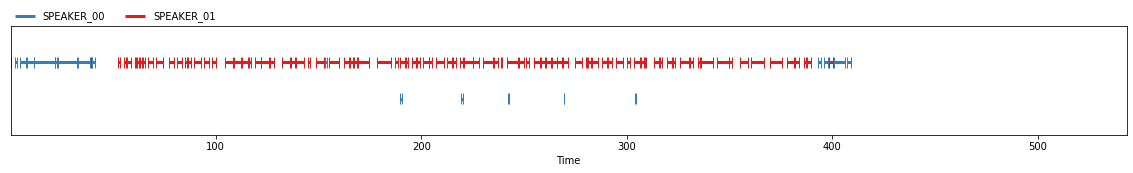

In [123]:
diarized[no][0]

In [ ]:
test.label_timeline('SPEAKER_01')

[7, 11, 10, 6, 1, 17, 16, 20, 19, 15, 3, 2, 14, 18, 13, 5, 9, 8, 4, 12]

In [145]:
data_clean_lower = [(data.label_timeline('SPEAKER_01'),part) for data,part in diarized if int(os.path.splitext(part)[0])<10]
data_clean_upper = [(data,part) for data,part in diarized if int(os.path.splitext(part)[0])>=10]
data_clean = data_clean_lower+data_clean_upper

In [147]:
from pyannote.audio import Inference
inference = Inference("pyannote/embedding", 
                      window="sliding",
                      duration=3.0, step=1.0)


In [161]:
test = data_clean[0][0]

wav_files = '/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/0300222_recordings_16khz'
wav = '/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/0300222_recordings_16khz/007.wav'

In [162]:
embeddings = inference(wav)
embeddings.crop(test)

array([[-24.932827 , -60.431786 ,  29.537624 , ...,  10.035393 ,
        -46.832077 , -28.047123 ],
       [ 29.219528 , -49.426956 ,  -0.6205292, ..., -18.675556 ,
         -4.2459526,  14.427252 ],
       [  6.378916 , -41.85813  ,  46.790756 , ..., -11.529085 ,
        -11.89146  , -20.140594 ],
       ...,
       [-43.197067 ,  -9.796235 ,  19.958652 , ..., -69.9541   ,
         28.94685  , -16.15511  ],
       [-52.5028   ,  -7.3465223, -16.575596 , ..., -53.196014 ,
        -29.388504 , -26.95376  ],
       [-27.408895 ,  -4.6837378,  24.107826 , ..., -28.706863 ,
          7.8609123,  36.099342 ]], dtype=float32)